Vamos estudar a importância da diversificação.

In [ ]:
import numpy as np ### baixando pacotes necessários a este trabalho.
import pandas as pd ### biblioteca para data science.
from pandas_datareader import data as web ### ler dados tabelados de sites.
import matplotlib.pyplot as plt ### ferramenta para gráficos.
import seaborn as sns ### pacote para relações estatísticas.
import datetime ### Usado para datas.
! pip install yfinance --upgrade --no-cache-dir
import yfinance as yf ### ferramenta para ler dados do site do Yahoo, especializados em ações.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.55
    Uninstalling yfinance-0.2.55:
      Successfully uninstalled yfinance-0.2.55


In [ ]:
ibov = yf.download('^BVSP')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.tail()

Price,Close,High,Low,Open,Volume
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP
Date,,,,,
2025-04-16,128317.000000,129605.000000,128149.000000,129245.000000,11540200
2025-04-17,129650.000000,130091.000000,127973.000000,128316.000000,9983400
2025-04-22,130464.000000,130877.000000,128726.000000,129650.000000,8605300
2025-04-23,132216.000000,133318.000000,130468.000000,130468.000000,11342700
2025-04-24,134849.171875,134937.546875,132223.453125,132245.046875,0


In [ ]:
ML =  yf.download("MGLU3.SA", start="2019-01-01") ### pegando cotações da Magazine Luiza.

[*********************100%***********************]  1 of 1 completed


In [ ]:
ML.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MGLU3.SA,MGLU3.SA,MGLU3.SA,MGLU3.SA,MGLU3.SA,MGLU3.SA
Date,,,,,,
2024-11-14,9.00,9.00,9.55,8.98,9.26,35674600
2024-11-18,9.23,9.23,9.46,9.00,9.10,29247600
2024-11-19,9.38,9.38,9.41,9.10,9.28,21220700
2024-11-21,9.14,9.14,9.31,9.11,9.22,29383300
2024-11-22,9.42,9.42,9.43,9.12,9.25,24574400


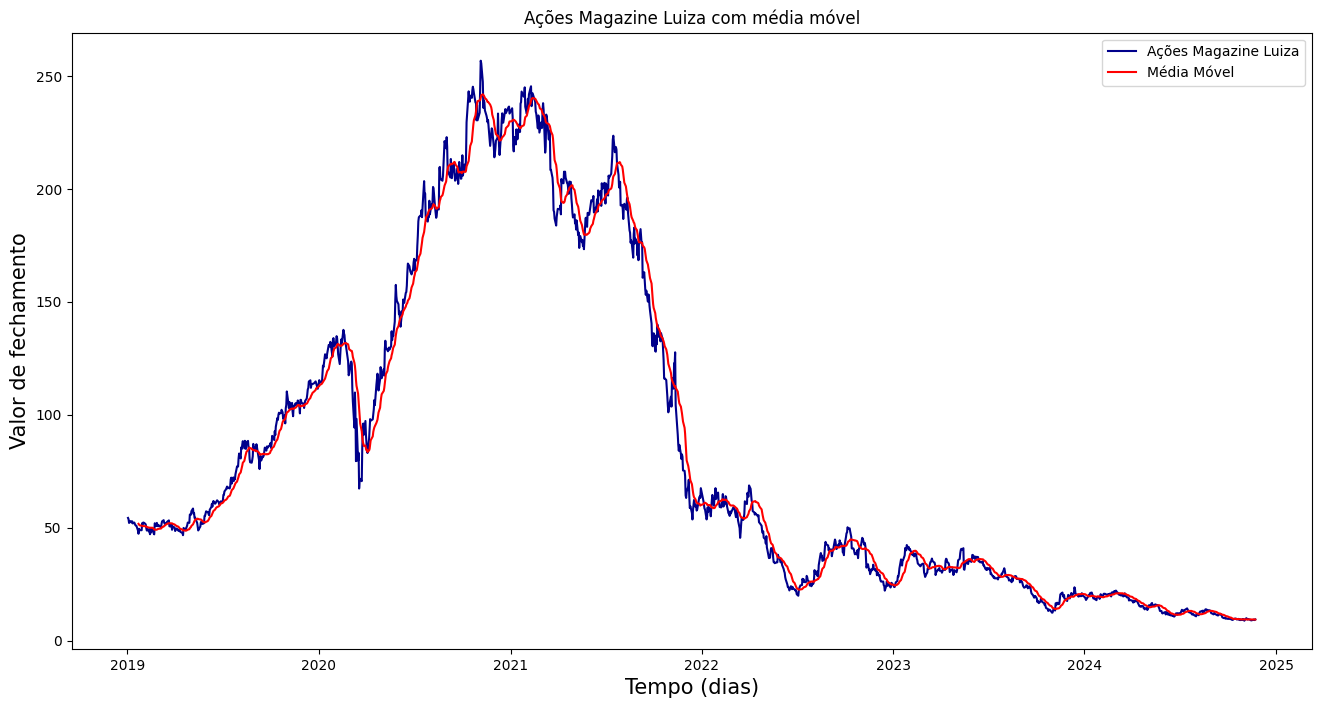

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ML['Close'], label='Ações Magazine Luiza', color='DarkBlue')
plt.plot(ML['Close'].rolling(15).mean(), label="Média Móvel", color="red")
plt.title('Ações Magazine Luiza com média móvel')
plt.xlabel('Tempo (dias)', fontsize=15)
plt.ylabel('Valor de fechamento', fontsize=15)
plt.legend()
plt.show()

In [ ]:
tickers =["^BVSP", "USDBRL=X"]
comp = yf.download(tickers, start = '2019-1-1')['Close'] ### comparando IBOVESPA e dólar.

[*********************100%***********************]  2 of 2 completed


In [ ]:
comp.head()

,Dólar,IBOVESPA
Date,,
2019-01-02,3.8799,91012.0
2019-01-03,3.7863,91564.0
2019-01-04,3.7551,91841.0
2019-01-07,3.6612,91699.0
2019-01-08,3.7341,92032.0


In [ ]:
comp.tail()

Ticker,USDBRL=X,^BVSP
Date,,
2024-11-18,5.7946,127768.00000
2024-11-19,5.7464,128197.00000
2024-11-20,5.7718,NaN
2024-11-21,5.7707,126922.00000
2024-11-22,5.7975,128956.90625


In [ ]:
comp=comp.dropna() ### removendo valores nulos.

In [ ]:
comp.columns = ["Dólar", "IBOVESPA"]

In [ ]:
comp.tail()

,Dólar,IBOVESPA
Date,,
2024-11-14,5.8059,127792.00000
2024-11-18,5.7946,127768.00000
2024-11-19,5.7464,128197.00000
2024-11-21,5.7707,126922.00000
2024-11-22,5.7975,128956.90625


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

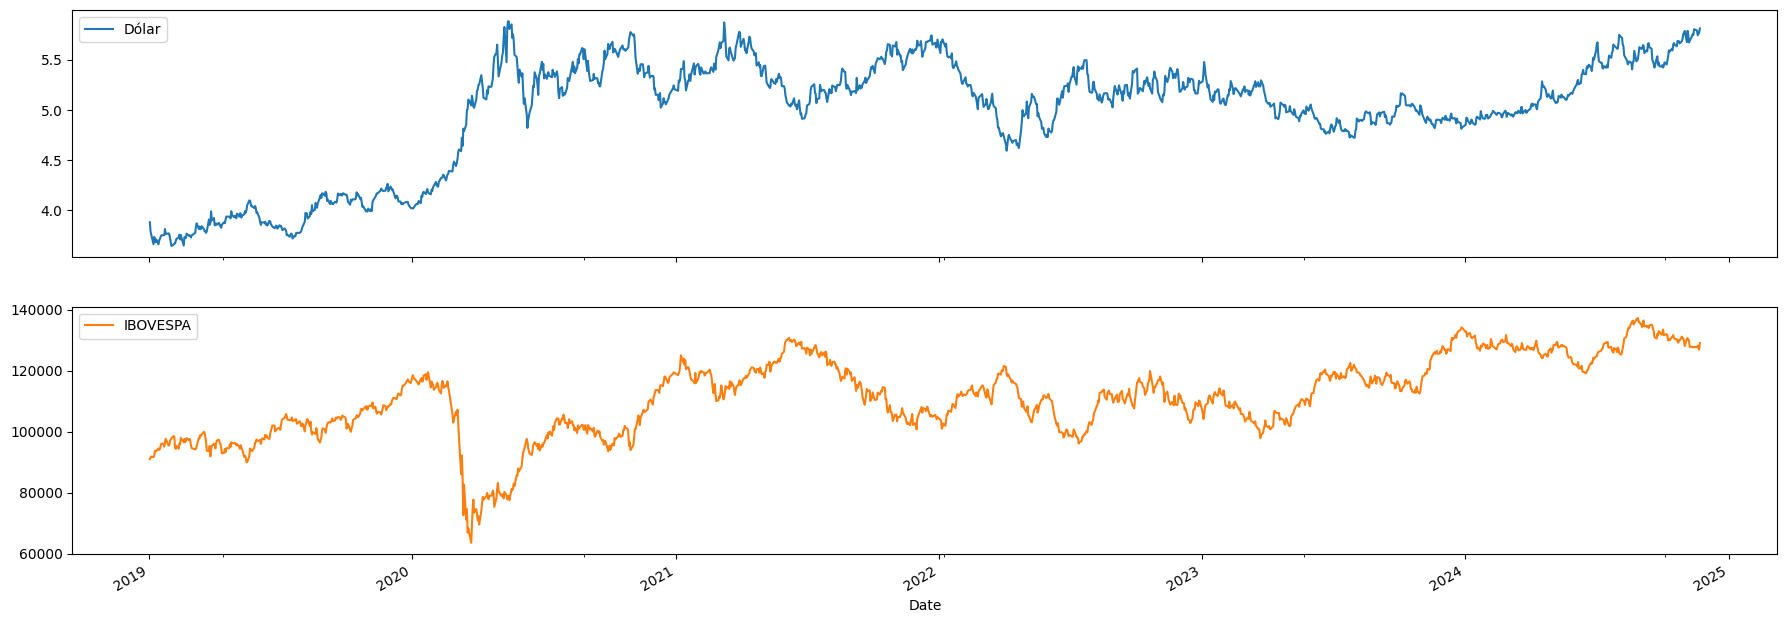

In [ ]:
comp.plot(subplots=True, figsize=(22,8))

In [ ]:
comp.corr()

,Dólar,IBOVESPA
Dólar,1.000000,0.257874
IBOVESPA,0.257874,1.000000


<Axes: >

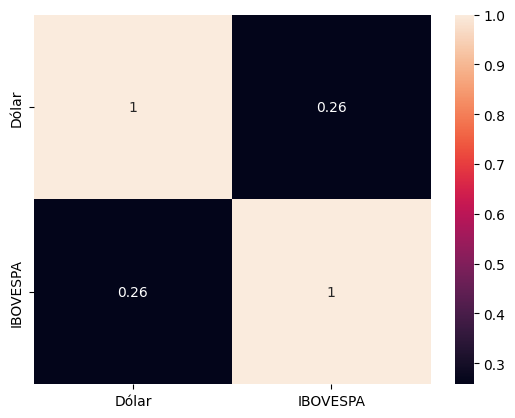

In [ ]:
sns.heatmap(comp.corr(), annot=True)

In [ ]:
comppct=comp.pct_change()

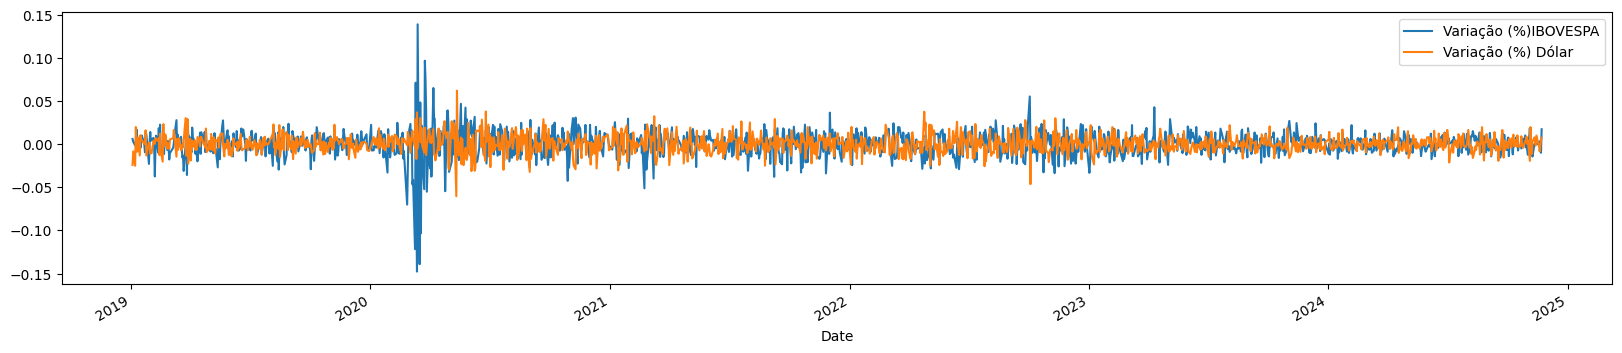

In [ ]:
comppct['IBOVESPA'].plot(figsize=(20,4), label = "Variação (%)IBOVESPA") ### gráfico das variações nos valores do dólar e do IBOVESPA.
comppct['Dólar'].plot(label = "Variação (%) Dólar")
plt.legend()

In [ ]:
MLR = ML['Close'].pct_change() ### retorno da ação: estou pedindo aqui as mudanças percentuais (de um dia para outro) no preço de fechamento.

In [ ]:
MLR.tail()

Date
2024-05-06    0.000000
2024-05-07    0.025478
2024-05-08    0.024845
2024-05-09    0.012121
2024-05-10   -0.083832
Name: Close, dtype: float64

<Axes: xlabel='Date'>

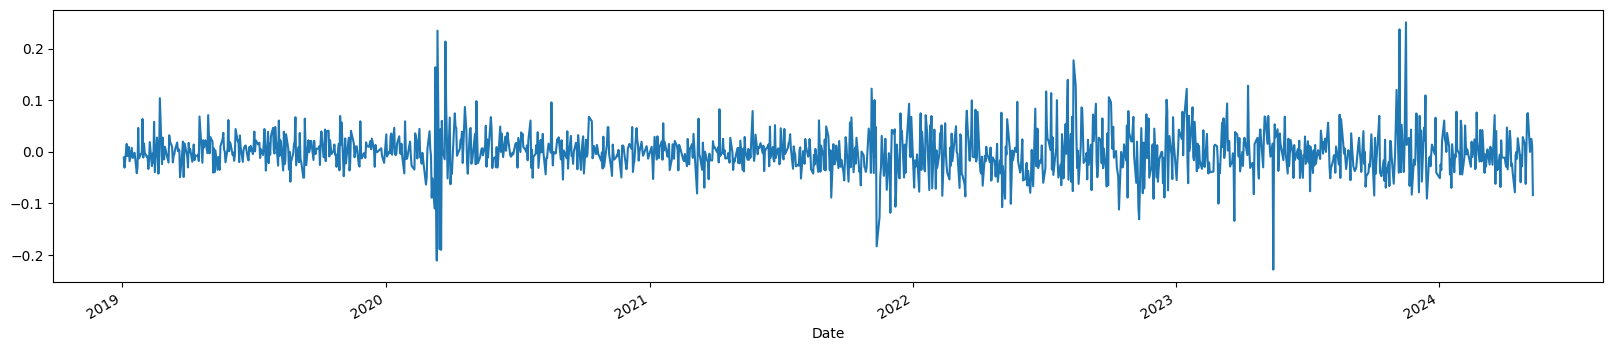

In [ ]:
MLR.plot(figsize=(20,4)) ### notem como a série ficou "diferenciada".

In [ ]:
PT =web.get_data_yahoo("PETR4.SA", start = '2019-1-1') ### pegando dados da ação da Petrobrás.

[*********************100%%**********************]  1 of 1 completed


In [ ]:
PT.tail() ### com os comandos tail ou head(), visualizamos os últimos ou primeiros valores do data frame (nossa tabela).

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-08,40.349998,41.330002,40.310001,41.270000,41.270000,25352000
2024-05-09,41.060001,41.840000,40.939999,41.669998,41.669998,27206400
2024-05-10,41.840000,42.090000,41.500000,41.580002,41.580002,27968700
2024-05-13,41.740002,41.970001,41.509998,41.619999,41.619999,18394300
2024-05-14,40.759998,41.299999,40.160000,40.869999,40.869999,53514500


<Axes: xlabel='Date'>

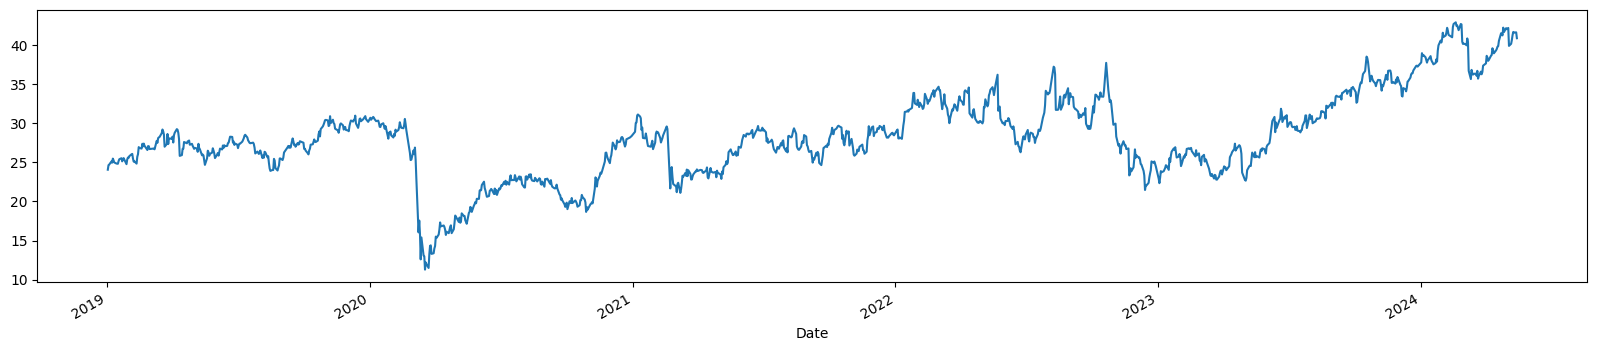

In [ ]:
PT['Close'].plot(figsize=(20,4))### gráfico do preço de fechamento das ações da Petrobrás.

In [ ]:
PTR = PT['Close'].pct_change()### retorno: preço venda de um dia - preço de venda do dia anterior, em termos percentuais.

In [ ]:
PTR.head() ### notem que se perde uma informação (a primeira) com essa operação.

Date
2019-01-02         NaN
2019-01-03    0.024522
2019-01-04    0.002840
2019-01-07    0.015777
2019-01-08   -0.005974
Name: Close, dtype: float64

<Axes: xlabel='Date'>

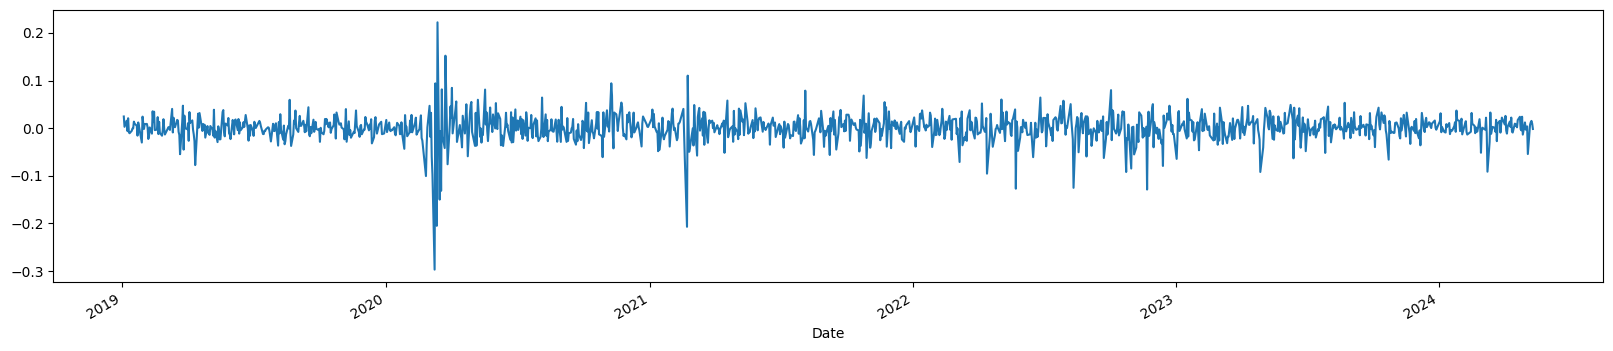

In [ ]:
PTR.plot(figsize=(20,4)) ### gráfico do retorno das ações da Petrobrás (ganhos de capital).

In [ ]:
MLR.std() ### Aqui estamos calculando o desvio padrão do retorno das ações do ML.

0.04207789459011339

In [ ]:
PTR.std() ### o mesmo para ações da Petrobrás. Notem que, por esse critério, as ações da Petrobraś são menos "arriscadas".

0.02864637049506307

In [ ]:
MLL = web.get_data_yahoo("MGLU3.SA", start = '2012-1-1') ### ações no longo prazo.
PTL = web.get_data_yahoo("PETR4.SA", start = '2012-1-1')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
MLLR = MLL['Close'].pct_change() ### variações percentuais no ganho de capital.
PTLR = PTL['Close'].pct_change()

In [ ]:
MLLR.head()

Date
2012-01-02         NaN
2012-01-03   -0.006453
2012-01-04   -0.009738
2012-01-05   -0.008746
2012-01-06    0.027563
Name: Close, dtype: float64

In [ ]:
MLLR.std() ### desvio padrão como medida do risco das ações do Magazine Luiza.

0.04017859381938476

In [ ]:
PTLR.std() ### desvio padrão como medida do risco das ações da Petrobrás.

0.030022719987585402

Notem que por um prazo mais longo, as ações da Petrobrás parecem ser mais seguras.

In [ ]:
IBV = pd.read_csv('ibv.csv', decimal = ',') ### IBOVESPA. Usando o argumento decimal, podemos ler csv em latim.

In [ ]:
IBV['data'] = pd.date_range(start='01/01/2013', periods=len(IBV), freq='M') ### acrescentando uma coluna de datas.

In [ ]:
IBV.head() ### peguei dados mensais. http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-estatisticas-historicas.htm

,valor,data
59761,49.0,2013-01-31
57424,29.0,2013-02-28
56352,9.0,2013-03-31
55910,37.0,2013-04-30
53506,8.0,2013-05-31


In [ ]:
IBVV = IBV['valor'].pct_change() ### extraindo a variação percental nos valores do IBV, ou seja procurando seu retorno.

In [ ]:
IBVV

59761           NaN
57424     -0.408163
56352     -0.689655
55910      3.111111
53506     -0.783784
            ...    
127752     0.166667
129020    -0.928571
128106    -0.500000
125924    18.000000
127122     0.315789
Name: valor, Length: 137, dtype: float64

In [ ]:
IBVV.std()

7.569705214901871

In [ ]:
IBVV.mean() ### rendimento médio mensal.

2.2037317779654053

Coletando dados e montando gráfico pelo smartphone.

In [ ]:
VL = wb.DataReader("VALE3.SA", data_source ='yahoo', start = '2020-1-1')

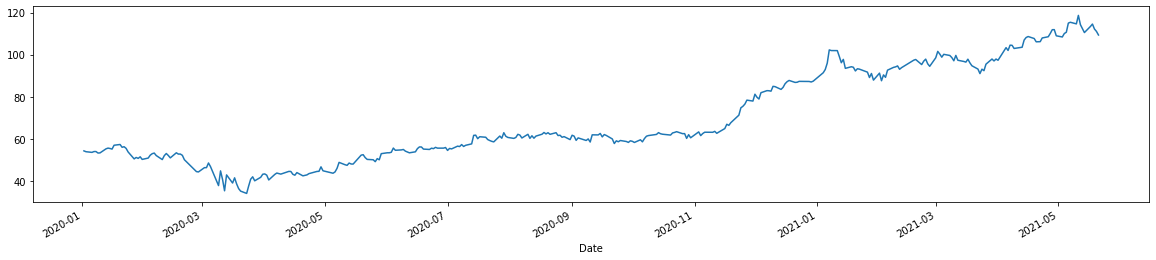

In [ ]:
 VL['Close'].plot(figsize=(20,4))

**Montando carteiras**

In [ ]:
carteira = ['BBAS3.SA', 'VALE3.SA', 'DTEX3.SA', 'MDIA3.SA', 'MGLU3.SA'] ### escolhendo as ações que farão parte de minha carteira.

In [ ]:
bancodedados = pd.DataFrame() ### criando um data frame para abrigar as ações.

In [ ]:
for i in carteira: ### pegando dados sobre o preço de fechamento das ações.
  bancodedados[i] = wb.DataReader(i, data_source= 'yahoo', start= '2018-1-1')['Close'] ### criando uma fórmula recorrente para fazer tudo de uma vez só.

In [ ]:
bancodedados.info() ### informações sobre o nosso banco de dados.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 840 entries, 2018-01-02 to 2021-06-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BBAS3.SA  840 non-null    float64
 1   VALE3.SA  840 non-null    float64
 2   DTEX3.SA  840 non-null    float64
 3   MDIA3.SA  840 non-null    float64
 4   MGLU3.SA  840 non-null    float64
dtypes: float64(5)
memory usage: 39.4 KB


In [ ]:
bancodedados.tail() ### últimas informações disponíveis.

,BBAS3.SA,VALE3.SA,DTEX3.SA,MDIA3.SA,MGLU3.SA
Date,,,,,
2021-05-26,32.980000,110.199997,21.309999,27.490000,19.67
2021-05-27,33.430000,110.989998,20.610001,27.740000,19.59
2021-05-28,33.540001,111.589996,20.660000,28.299999,20.25
2021-05-31,33.490002,114.779999,20.580000,29.290001,20.16
2021-06-01,33.980000,113.199997,21.530001,29.690001,20.35


Vamos calcular o retorno das ações da carteira: *retorno = (valor de hoje/valor de ontem) - 1*.

In [ ]:
retornos = (bancodedados/bancodedados.shift(1)) - 1 ### notem que vamos perder a primeira informação.

In [ ]:
retornos.head()

,BBAS3.SA,VALE3.SA,DTEX3.SA,MDIA3.SA,MGLU3.SA
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.012754,-0.005992,0.018182,0.007122,-0.012610
2018-01-04,0.009595,0.004099,0.025210,0.013750,0.024010
2018-01-05,0.000000,0.015610,0.004098,-0.004844,-0.019706
2018-01-08,0.002376,0.022227,-0.003061,-0.018692,0.000127


Vamos distribuir pesos (iguais) às ações para se compor, efetivamente, a carteira.

In [ ]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) ### pesos de 20%.

In [ ]:
retcarteira = np.dot(retornos, pesos) ### aqui estamos multiplicando a matriz de retornos por seus respectivos pesos.

In [ ]:
retcarteiradf = pd.DataFrame(retcarteira) ### estamos aqui criando uma tabela com o resultado acima.

In [ ]:
retcarteiradf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       839 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB


In [ ]:
retcarteiradf.head()

,0
0,NaN
1,0.003891
2,0.015333
3,-0.000968
4,0.000596


In [ ]:
retcarteiradf.std() ### calculando o desvio padrão (nossa medida de risco) para a carteira.

0    0.021602
dtype: float64

Vamos comparar o devio-padrão da carteira com os das ações.

In [ ]:
retornos['MGLU3.SA'].std() ### desvio padrão (risco) da ação da Magazine Luiza.

0.03355155126138057

In [ ]:
retornos['MDIA3.SA'].std() ### desvio padrão (risco) da ação da M Dias Branco.

0.024405888562066935

In [ ]:
retornos['DTEX3.SA'].std() ### desvio padrão (risco) da ação da Duratex.

0.03103840722903079

In [ ]:
retornos['VALE3.SA'].std() ### desvio padrão (risco) da ação da Vale.

0.027134309518373267

In [ ]:
retornos['BBAS3.SA'].std() ### desvio padrão (risco) da ação do Banco do Brasil.

0.028543545901684893

Logo, o desvio padrão (medida do risco) da carteira é menor do que os desvio padrão de cada ação individual.

Vamos calcular o retorno médio da carteira

In [ ]:
mediacarteira = retornos.mean()*100 ### vezes cem para termos os valores em porcentagem.

In [ ]:
mediacarteira ### calculamos o retorno médio diário de cada ação da carteira.

BBAS3.SA    0.044540
VALE3.SA    0.156197
DTEX3.SA    0.148141
MDIA3.SA   -0.033507
MGLU3.SA    0.307365
dtype: float64

In [ ]:
np.dot(mediacarteira, pesos) ### retorno médio total da carteira. Atenção: estamos falando aqui de retorno diário médio em %.

0.12454711872542666

Na carteira, as ações têm o mesmo peso. Podemos ver o rendimento médio por ação para reponderar a carteira.

In [ ]:
mediacarteira = retornos.mean()*100 ### retorno médio diário de cada ação, ou seja, sem os pesos.
print(mediacarteira)

BBAS3.SA    0.044540
VALE3.SA    0.156197
DTEX3.SA    0.148141
MDIA3.SA   -0.033507
MGLU3.SA    0.307365
dtype: float64


In [ ]:
### Segundo os números acima, podemos reduzir os pesos das ações do BB e da M Dias Branco. Aumentando o peso da Magalu.

In [ ]:
peso2 = np.array([0.1, 0.2, 0.1, 0.1, 0.5])

In [ ]:
np.dot(mediacarteira, peso2) ### valores médios (1 X 5) x pesos2 (5 X 1)

0.20083909442009043

Ou seja, aumentando a participação das ações que mais rendem e diminuindo as de menor rendimento, melhoramos o redimento total das carteiras.
